<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='white'>
Michal Cohen, 323071373   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 4/7/2024 at 23:59

## Part 1 - K-Means (35%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [33]:
import matplotlib.pyplot as plt
import numpy as np

### **2. Data**

### **2.1 Convex Data**

Generate a convex 2D dataset

In [34]:
## Generate 2D data
X_convex = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X_convex)

print(X_convex.shape)


(2000, 2)


Plot the a convex 2D dataset to explore how many clusters it contains

<ipython-input-35-6372238>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_convex[:, 0], X_convex[:, 1], cmap='viridis')


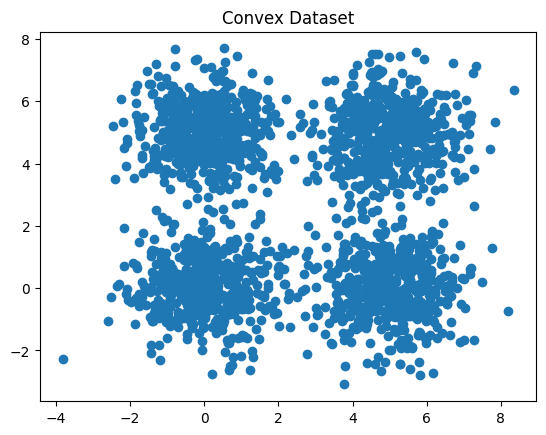

In [35]:
plt.title("Convex Dataset")
plt.scatter(X_convex[:, 0], X_convex[:, 1], cmap='viridis')

### **2.2 Non-Convex Data**

Generate a non-convex 2D dataset

In [36]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X_non_convex, y = make_moons(n_samples=300, noise=0.05, random_state=42)


Plot the non convex 2D dataset to explore how many clusters it contains

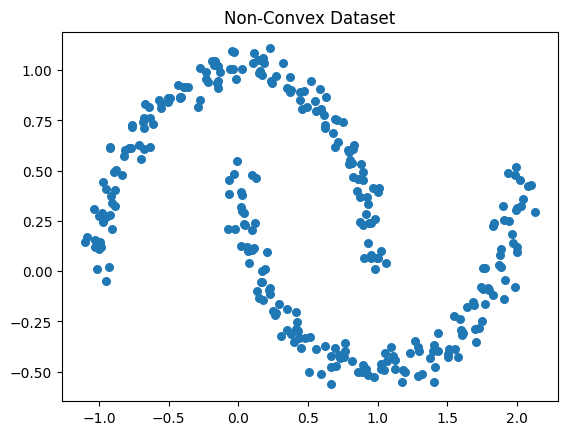

In [37]:
plt.scatter(X_non_convex[:, 0], X_non_convex[:, 1], s=30)
plt.title("Non-Convex Dataset")
plt.show()

### **3. K-Means**

Implement the algorithm

In [38]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        self.X_fit_ = X
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[indices]

        for _ in range(self.max_iter):
            labels = self._get_labels(X)
            cost = self._calculate_cost(X)
            self.labels_history.append(labels)
            self.centroids_history.append(self.centroids.copy())
            self.costs.append(cost)

            new_centroids = self._get_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

        self.labels_ = self._get_labels(X)
        self.centroids = self._get_centroids(X, self.labels_)

    def predict(self, X):
        return self._get_labels(X)

    def _get_distances(self, X):
        return np.sum((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2, axis=2)

    def _get_labels(self, X):
        distances = self._get_distances(X)  # shape: (n_samples, k)
        return np.argmin(distances, axis=1)

    def _get_centroids(self, X, labels):
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centroid = np.mean(cluster_points, axis=0)
            else:
                centroid = self.centroids[i]
            new_centroids.append(centroid)
        return np.array(new_centroids)

    def _calculate_cost(self, X):
        labels = self._get_labels(X)
        distances = self._get_distances(X)
        # For each sample, select the distance to its assigned centroid
        point_costs = distances[np.arange(len(X)), labels]
        return np.sum(point_costs)

### **3.1 K-Means Using Convex Data**

Run the algorithm on the 2D convex dataset

In [68]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_convex)

Plot a graph of the costs as a function of the iterations

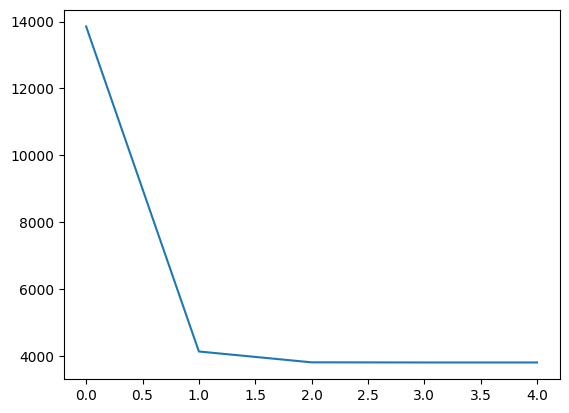

In [69]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 16493 <br>
3 clusters: 9762 <br>
4 clusters: 3860 <br>
6 clusters: 3155 <br>
8 clusters: 2635 <br>
10 clusters: 2190 <br>
20 clusters: 1141 <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

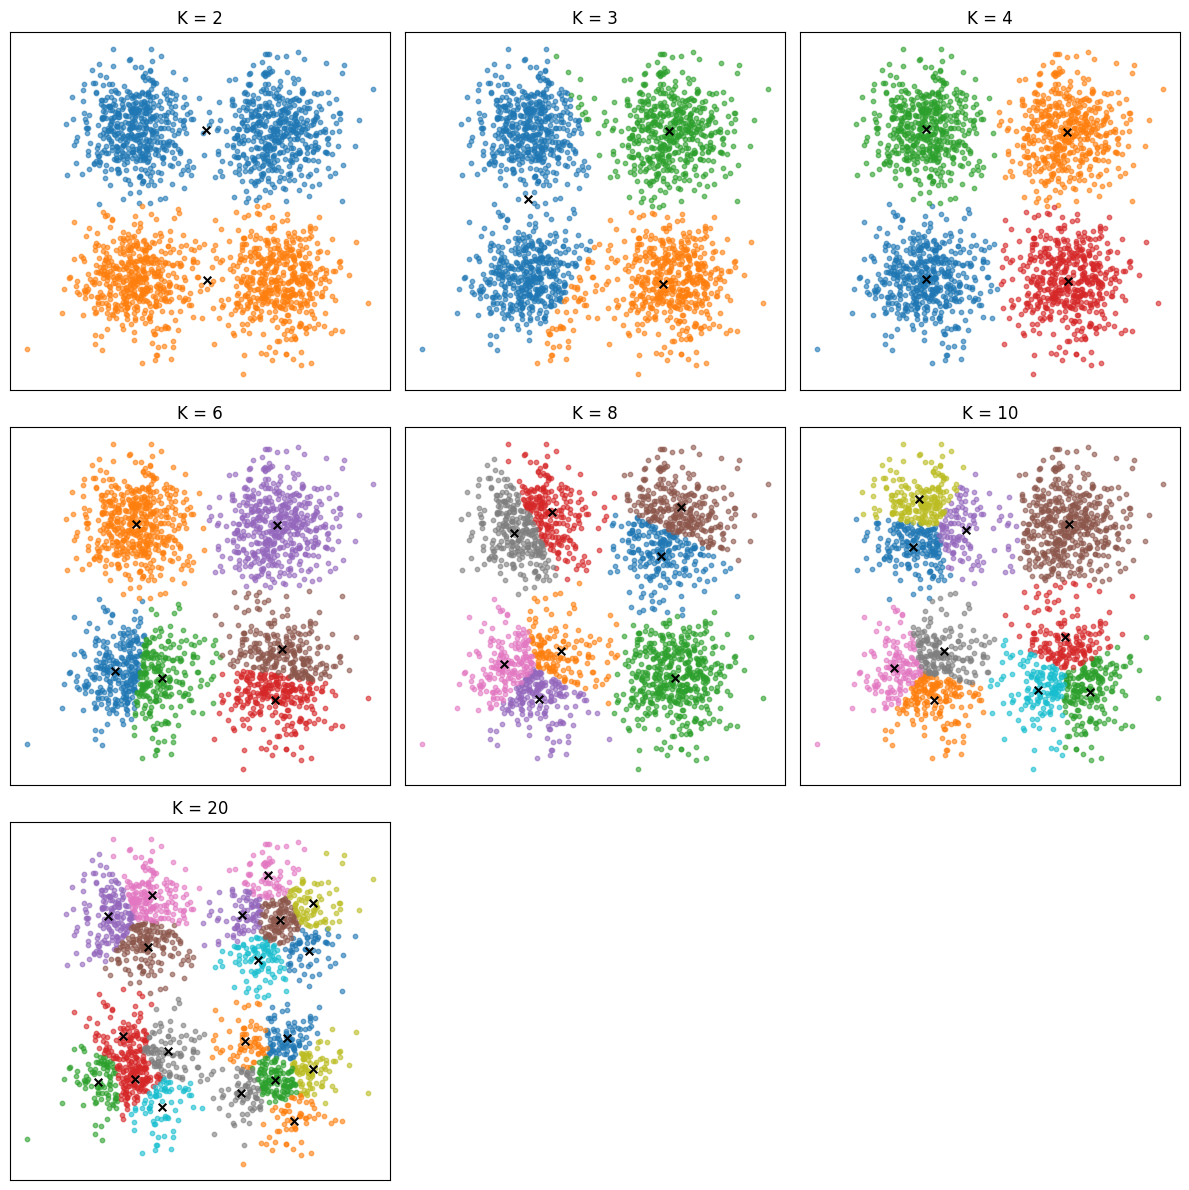

In [41]:
def plot(X):
    cluster_sizes = [2, 3, 4, 6, 8, 10, 20]
    n = len(cluster_sizes)
    n_cols = 3
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    for idx, k in enumerate(cluster_sizes):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]

        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)

        labels = kmeans.labels_
        centroids = kmeans.centroids

        for cluster_id in range(k):
            cluster_points = X[labels == cluster_id]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], alpha=0.6, s=10)

        ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=30)
        ax.set_title(f"K = {k}")
        ax.set_xticks([])
        ax.set_yticks([])

    for i in range(len(cluster_sizes), n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

plot(X_convex)

### **3.1 K-Means Using Non-Convex Data**

Run the algorithm on the 2D non-convex dataset

In [70]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_non_convex)

Plot a graph of the costs as a function of the iterations

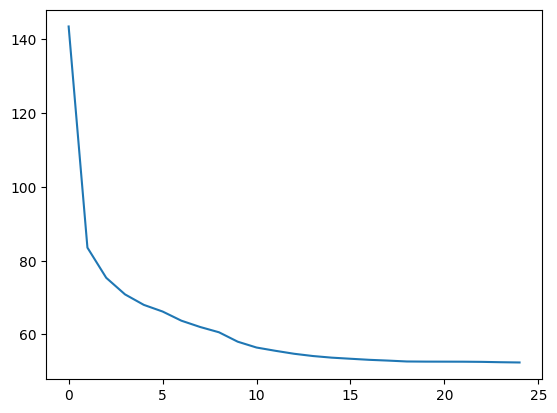

In [71]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 121<br>
3 clusters: 81<br>
4 clusters: 52<br>
6 clusters: 27<br>
8 clusters: 16<br>
10 clusters: 17<br>
20 clusters: 5<br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

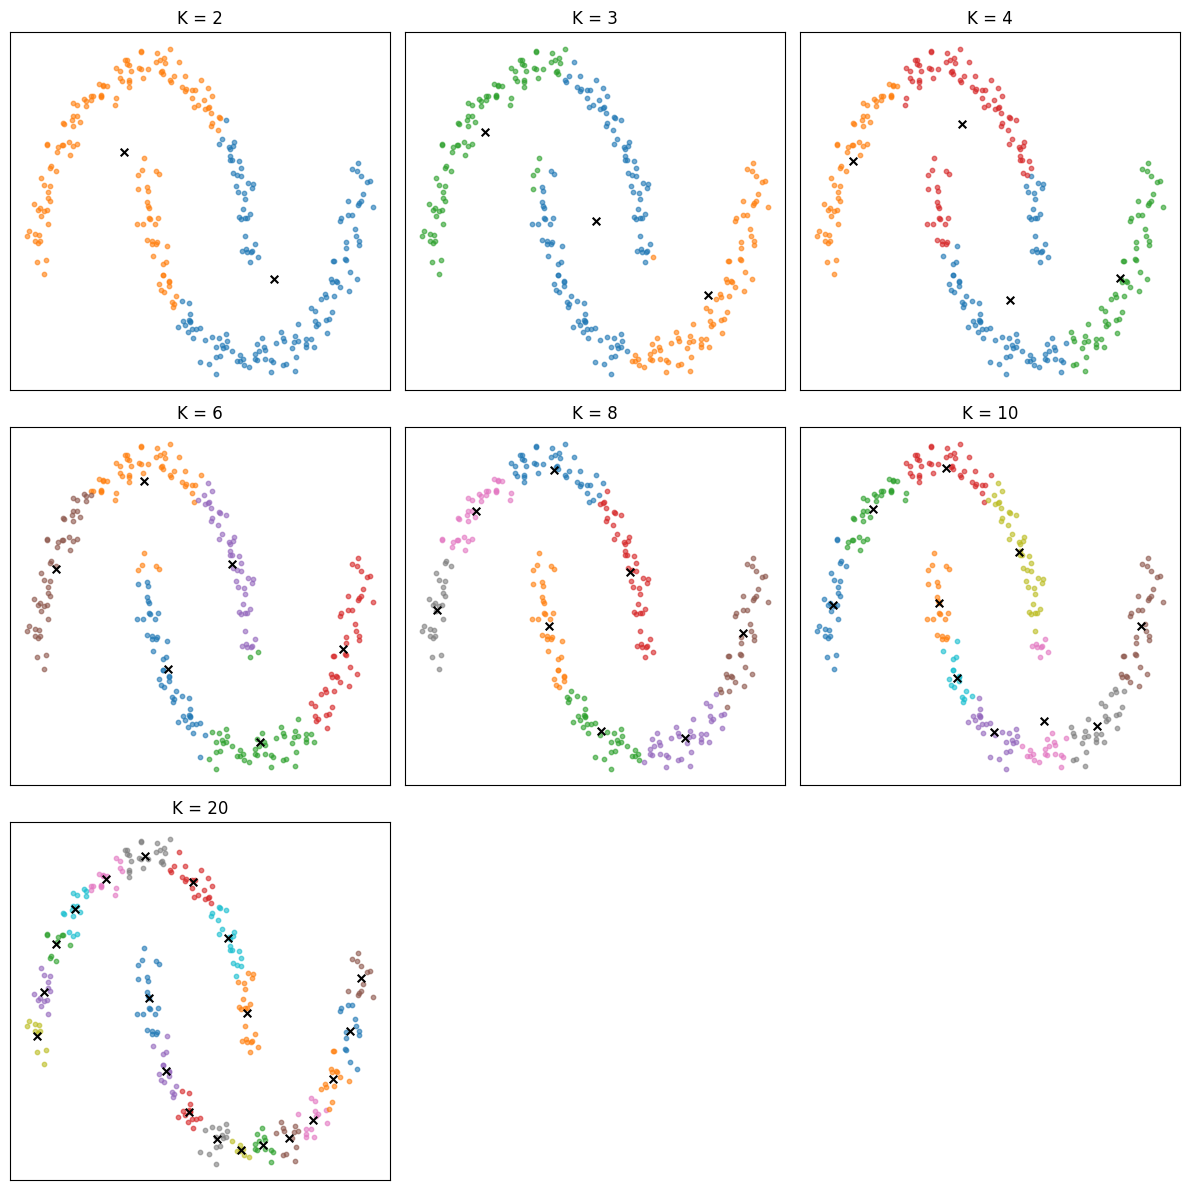

In [44]:
plot(X_non_convex)

Explain the output of k-means for both datasets. Focus on when k-means successfully classifies the dataset and when it fails. Provide an explanation for why this happens.

<font color=8DBCC7>

K-means succeeds with the convex dataset and fails with the non_convex dataset. This is because k-means is a linear algorithm, and minimizes euclidean distances. When the data is convex-- ie, linearally seperable and "spherical", euclidean distances match this geometry. However when the data is non-convex, (as was here, there was overlap in one of the axes), then euclidian distance no longer holds meaning and k-means fails.
</font>

<font color=8DBCC7>

Note the definition of a convex shape: for any two points in the shape, if you draw a line between them, the every point in the line stays in the shape (ex circles). Convex shapes work with kmeans because measuring the distance from the centroid to each datapoint is like drawing a line.
However with nonconvex shapes (ex halfmoons), the data within a radius of the centroid can belong to a different cluster, so this line-- measuring the distance-- is
not reliable.
</font>

## Part 2 - PCA (35%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [45]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [46]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [47]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        cov = np.cov(X_centered, rowvar=False)
        eig_vals, eig_vecs = np.linalg.eigh(cov)

        sorted_indices = np.argsort(eig_vals)[::-1]
        self.V = eig_vecs[:, sorted_indices]

    def transform(self, X, n_dimentions):
        X_centered = X - self.mean
        V_top = self.V[:, :n_dimentions]
        X_reduced = X_centered @ V_top
        return X_reduced



Run the algorithm on MNIST dataset.

In [48]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

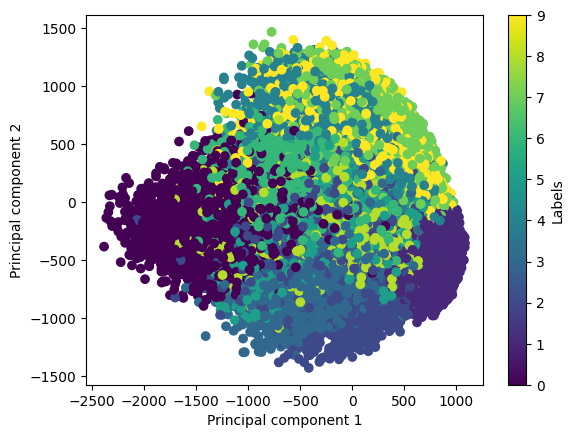

In [49]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

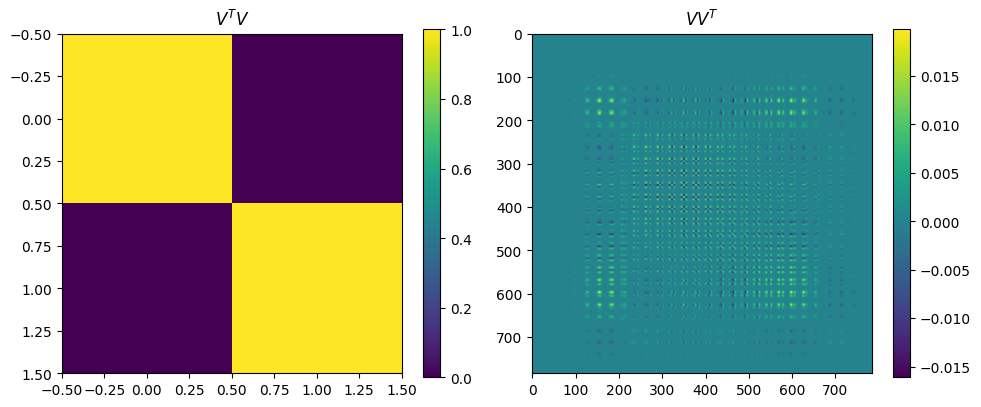

In [50]:
r = 2
V_r = pca.V[:, :r]

VtV = V_r.T @ V_r
VVt = V_r @ V_r.T

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

im0 = axes[0].imshow(VtV, cmap='viridis')
axes[0].set_title(r"$V^T V$")
fig.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(VVt, cmap='viridis')
axes[1].set_title(r"$V V^T$")
fig.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()


Your Explanation:

<font color=8DBCC7>

Note $V^tV$ has dimension $\mathbb{R}^{r\times r}$, which in this case is 2x2. Therefor the grid is divided into four, as there are only four elements in the matrix. It is the identity matrix, since the columns of V are orthonomal, and form a basis in $\mathbb{R}^r$.
</font>

<font color=8DBCC7>

$VV^t$ is $\mathbb{R}^{d\times d},$ which in this case is 784x784. Since V does not span all of $\mathbb{R}^d$ (only $\mathbb{R}^r$, and $r<d$), we get zeroes in our matrix. This matrix is a "projection matrix"-- ie, when multiplying a vector by it, we get the projection of the vector onto the subspace defined by V (which is $\mathbb{R}^r$)
</font>

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [51]:
def pca_reconstruction(x, n_dimentions):
    V_r = pca.V[:, :n_dimentions]
    x_centered = x - pca.mean

    z = V_r.T @ x_centered
    x_reconstructed = V_r @ z + pca.mean

    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


<font color=8DBCC7>

No, the reconstructed and original image are not the same. When mapping to a lower dimension we lose information. Therefor we can't get the original image back.
</font>

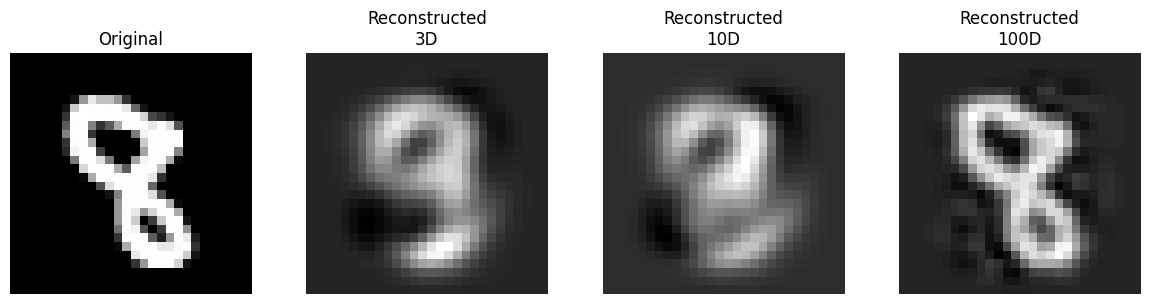

In [52]:
import random

idx = random.randint(0, X.shape[0] - 1)
sample = X[idx]

dims = [3, 10, 100]
reconstructions = [pca_reconstruction(sample, d) for d in dims]
plt.figure(figsize=(12, 3))

plt.subplot(1, len(dims) + 1, 1)
plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.title("Original")
plt.axis('off')
for i, d in enumerate(dims):
    plt.subplot(1, len(dims) + 1, i + 2)
    plt.imshow(reconstructions[i].reshape(28, 28), cmap='gray')
    plt.title(f"Reconstructed\n{d}D")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Part 3 - Convolutional Neural Networks (30%)

This part is related to the NN implementation from HW4, so pay attention.
In this section, we are going to implement a convolutional neural network (CNN) and train it on the mnist dataset. It will be very similar to what you did in the previous sections but now we use new layers like ```convolution```and ```pooling```.  

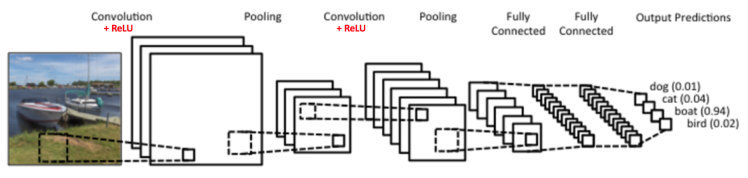

Reminder:  
Go over this **[article](https://cs231n.github.io/convolutional-networks/)** to better understand convolutional neural networks.

- **Convolutional operation:** A “filter”, also called a “kernel”, is passed over the image, viewing a few pixels at a time (for example, 3X3 or 5X5). The convolution operation is a dot product of the original pixel values with weights defined in the filter. The results are summed up into one number that represents all the pixels the filter observed.

- **Pooling:** “Pooling” is the process of further downsampling and reducing the size of the matrix. A filter is passed over the results of the previous layer and selects one number out of each group of values (typically the maximum, this is called max pooling). This allows the network to train much faster, focusing on the most important information in each feature of the image. By sliding the window along the image, we compute the mean or the max of the portion of the image inside the window in case of MeanPooling or MaxPooling.

- **Stride:** The number of pixels to pass at a time when sliding the convolutional kernel.

- **Padding:** To preserve exactly the size of the input image, it is useful to add zero padding on the border of the image.

**How do we compute the output size of a convolutional layer?**

input:
- An image of dimensions $W_{in}×H_{in}$.
- A filter of dimensions $K \times K$.
- Stride $S$
- padding $P$

$W_{out} = \left\lfloor\frac{W_{in} - F + 2P}{S}\right\rfloor + 1$
<br>

$H_{out} = \left\lfloor\frac{H_{in} - F + 2P}{S}\right\rfloor + 1$

**Q1:** Given an image with shape [1,28,28], what will be the shape of the output of a convolution layer with 10 5x5 kernels (filters), with stride of 1, and without padding?

**A1:**
Plugging into the equation <br>

F=5, S=1, P=0, $W_{in}$ = 28, $W_{out}$ = 28 <br>

$W_{out} = \left\lfloor \frac{28 - 5 + 2 \times 0}{1} \right\rfloor + 1$ = 24

$H_{out} = \left\lfloor \frac{28 - 5 + 2 \times 0}{1} \right\rfloor + 1$ = 24

So we get shape 24x24


**Q2:** We would like our convolution layer to output a volume with the same shape as the input image. So input_shape and output_shape will be [1,28,28]. What should be the padding (assume 5x5 filter and stride of 1)?

**A2:**
P = 2. Plugging in F=5, S=1, $W_{in}$ = 28, $W_{out}$ = 28, we get

$W_{out} = \left\lfloor \frac{28 - 5 + 2 \times P}{1} \right\rfloor + 1 = 28 \rightarrow P=2$

$H_{out} = \left\lfloor \frac{28 - 5 + 2 \times 0}{1} \right\rfloor + 1 = 28 \rightarrow P = 2$

**Q3:** Consider an input image with shape [1, 28, 28]. You apply two consecutive convolution layers. The first convolution layer uses 20 filters, each of size 3x3, with a stride of 1 and no padding. The second convolution layer uses 15 filters, each of size 3x3, with a stride of 3 and padding of 2. What will be the shape of the output after these two convolution layers?

**A3:**

$W_{layer1} = \left\lfloor \frac{28 - 3 + 2 \times 0}{1} \right\rfloor + 1= 26$ <br>

$H_{layer1} = \left\lfloor \frac{28 - 3 + 2 \times 0}{1} \right\rfloor + 1= 26$ <br>

Layer1 shape is [20,26,26] <br>


$W_{layer2} = \left\lfloor \frac{26 - 3 + 2 \times 2}{3} \right\rfloor + 1 = 10$<br>

$H_{layer2} = \left\lfloor \frac{26 - 3 + 2 \times 2}{3} \right\rfloor + 1 = 10$<br>

Layer 2 (output) shape is [15,10,10]<br>

Let's create a simple Convolutional neural network.
The architecture:  
**Conv layer** (10 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Conv layer** (20 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Hidden layer** (320 units) -> **Relu** -> **Hidden layer** (50 units) -> **Output layer** (10 outputs).

In [53]:
# Imports from Assignment 4
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils import data
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader

In [54]:
class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x) # conv 1
        x = F.max_pool2d(x, 2) # max pooling 1
        x = F.relu(x) # relu
        x = self.conv2(x) # conv 2
        x = F.max_pool2d((x), 2) # max pooling 2
        x = F.relu(x) # relu
        x = x.view(-1, 320) # flatten input
        x = self.fc1(x) # hidden layer 1
        x = F.relu(x) # relu
        x = self.fc2(x) # hidden layer 2
        return F.log_softmax(x, dim=1) #output

cnn_model = ConvolutionalNet()
print(cnn_model)

ConvolutionalNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [55]:
# Training from Assignment 4

def train_model(model, optimizer, criterion,
                nepochs, train_loader, val_loader, is_image_input = False):
  train_losses, val_losses = [], []
  for e in range(nepochs):
      running_loss = 0
      running_val_loss = 0
      for images, labels in train_loader:
          if is_image_input:
            # Flatten Fashion-MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

          # Training pass
          model.train() # set model in train mode

          # Compute the loss and do the backward and optimizer step
          optimizer.zero_grad()
          output = model(images)
          loss = criterion(output, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
      else:
          val_loss = 0
          # 6.2 Evalaute model on validation at the end of each epoch.
          with torch.no_grad():
              for images, labels in val_loader:
                  if is_image_input:
                    # Flatten Fashion-MNIST images into a 784 long vector
                    images = images.view(images.shape[0], -1)
                  model.eval() # set model in evaluation mode

                  # compute the Validation Loss
                  output = model(images)
                  val_loss = criterion(output, labels)

                  running_val_loss += val_loss.item()

          # 7. track train loss and validation loss
          train_losses.append(running_loss/len(train_loader))
          val_losses.append(running_val_loss/len(val_loader))

          print("Epoch: {}/{}.. ".format(e+1, nepochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                "Validation Loss: {:.3f}.. ".format(running_val_loss/len(val_loader)))
  return train_losses, val_losses

In [56]:
# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
X_tensor = X_tensor.view(-1, 1, 28, 28)
y = np.array(y).astype(int)
y_tensor = torch.tensor(y, dtype=torch.long)

# Normalize inputs to [0, 1] range if not already
X_tensor /= 255.0

# Create a TensorDataset
mnist_data = TensorDataset(X_tensor, y_tensor)


In [57]:
#From Assignment 4
train_size = int(0.8 * len(mnist_data))
val_size = len(mnist_data) - train_size
train_dataset, val_dataset = data.random_split(mnist_data, [train_size, val_size])

train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=64, shuffle=False)

We can now train the model on the train set.

In [58]:
# set hyperparameters
cnn_nepochs = 3
cnn_learning_rate = 0.03

In [59]:
# train the conv model
cnn_model = ConvolutionalNet()
# create sgd optimizer
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)

Epoch: 1/3..  Training Loss: 0.745..  Validation Loss: 0.220.. 
Epoch: 2/3..  Training Loss: 0.141..  Validation Loss: 0.097.. 
Epoch: 3/3..  Training Loss: 0.093..  Validation Loss: 0.083.. 


In [60]:
#From Assignment 4
def evaluate_model(model, val_loader, is_image_input=False):
  '''
  Evaluate a model on the given dataloader.
  Params:
  model - a pytorch model to train
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                   Should be True for Neural Networks
                                   but False for Convolutional Neural Networks.
  '''
  validation_accuracy = 0
  with torch.no_grad():
      model.eval()
      for images, labels in val_loader:
          if is_image_input:
            # flatten Fashion-MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
          # forward pass
          test_output = model(images)
          ps = torch.exp(test_output)
          top_p, top_class = ps.topk(1, dim=1)
          # count correct predictions
          equals = top_class == labels.view(*top_class.shape)
          validation_accuracy += torch.sum(equals.type(torch.FloatTensor))
  res = validation_accuracy/len(val_loader.dataset)
  return res

In [61]:
# evaluate on the validation set
print(f"Validation accuracy: {evaluate_model(cnn_model, val_loader, is_image_input=False)}")

Validation accuracy: 0.9746428728103638


You should probably see that our CNN performs better on the validation set compared to the simple neural network (within 3 epochs only!) :)

___________

Now it's your turn: Use the code above and create a convolutional neural network that achieves the best accuracy on the validation set.
Note that you must use only the Fashion-MNIST training set as we did earlier:
```mnist_data = datasets.FashionMNIST(data_path, download=True, train=True, transform=transform)```

**Using any other or additional data from the test set will result in point deductions (without any bonus)!**

You should consider changing (change at least 4 things):  
1. Network architecture:
  - Number of convolutional layers
  - Number of kernels (filters) for each convolutional layer
  - Size of each kernel on each layer
  - Number of hidden layers (fully connected)
  - Number of units for each hidden layer
  - Usage of layers like BatchNormalization and Dropout.
  - Usage of max pooling (or maybe other pooling strategies)

2. Training hyperparameters:
  - Learning rate
  - Optimizer (SGD with momentum, adam, etc)
  - Number of epochs

To get full points in this part: make sure you implement the model architecture correctly, train the model properly, use the optimizer effectively, and ensure your validation accuracy is greater than 80%. **(4 points for this part)**

In [62]:
## TODO: Prepocess
data_path = "./FashionMNIST_data_CNN"
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the data
mnist_data = datasets.FashionMNIST(data_path, download=True, train=True, transform=transform)
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

# split trainset into train (80%) and validation (20%)
train_size = int(0.8 * len(mnist_data))
val_size = len(mnist_data) - train_size
train_dataset, val_dataset = data.random_split(mnist_data, [train_size, val_size])
train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=64, shuffle=False)

In [63]:
class MyConvolutionalNet(nn.Module):
    def __init__(self):
        super(MyConvolutionalNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.dropout = nn.Dropout(0.3)

        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)

        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [64]:
# TODO: Find network and hyperparams that achieve best validation accuracy as possible
cnn_nepochs = 5
cnn_learning_rate =  0.03

In [65]:
# TODO: Save the best model in this variable and evaluate on the validation set
cnn_model = MyConvolutionalNet()
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate)
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader,
                                       is_image_input=False)

best_model = cnn_model
print(f"Validation accuracy: {evaluate_model(best_model, val_loader, is_image_input=False)}")

Epoch: 1/5..  Training Loss: 0.520..  Validation Loss: 0.358.. 
Epoch: 2/5..  Training Loss: 0.362..  Validation Loss: 0.291.. 
Epoch: 3/5..  Training Loss: 0.321..  Validation Loss: 0.274.. 
Epoch: 4/5..  Training Loss: 0.295..  Validation Loss: 0.273.. 
Epoch: 5/5..  Training Loss: 0.277..  Validation Loss: 0.257.. 
Validation accuracy: 0.9081666469573975


When you are satisfied with your model performance on the validation set, load the test set given to you (**important** - apply any transformation you applied to the train set before) - [FashionMNIST_test.pth](https://drive.google.com/file/d/1FeOaoRU-tkhOiKzsK_UZNwbNPaRqaDVu/view?usp=sharing), into your drive assignment folder (e.g "machine_learning/assignments/assignment5/FashionMNIST_test.pth"), and write the model predictions for each test sample to a file called "predictions.txt". You can use the code below.


**Download the "predictions.txt" file to your computer, and then upload it to the "submit" system with this notebook in one zip file named ex4.zip**

Ensure each prediction is printed in a new line.

For Example ("predictions.txt"):
```
0  
5  
9
```

<font color='blue'><b>
Note: Bonus points will be given for the top 10 submissions having the highest test accuracy:
- Top 1-3 get 5 points
- Top 4-6 get 3 points
- top 7-10 get 2 points  
</b></font>  

In [66]:
def predict_and_save(model, test_path, file_name):
  # load mnist test data
  mnist_test_data = torch.utils.data.TensorDataset(torch.load(test_path))

  ## TODO: Prepocess the test set (i.e apply the transform to normalize the test set as you did to your train set)
  transform = transforms.Normalize((0.5,), (0.5,))
  imgs_tensor = mnist_test_data.tensors[0]
  imgs_tensor = transform(imgs_tensor)
  mnist_test_data = torch.utils.data.TensorDataset(imgs_tensor)

  # create a dataloader
  mnist_test_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=1, shuffle=False)
  # make a prediction for each batch and save all predictions in total_preds
  total_preds = torch.empty(0, dtype=torch.long)
  for imgs in mnist_test_loader:
    log_ps = model(imgs[0])
    ps = torch.exp(log_ps)
    _, top_class = ps.topk(1, dim=1)
    total_preds = torch.cat((total_preds, top_class.reshape(-1)))
  total_preds = total_preds.cpu().numpy()
  # write all predictions to a file
  with open(file_name,"w") as pred_f:
    for pred in total_preds:
      pred_f.write(str(pred) + "\n")


In [67]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
predict_and_save(best_model, test_path=f"/content/drive/MyDrive/machine_learning/assignments/assignment5/FashionMNIST_test.pth", file_name="predictions.txt")
from google.colab import files
files.download("predictions.txt")

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>